## Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<div class="alert alert-info">
<h2> Комментарий от ревьюера</h2>
Привет. Меня зовут Алина Гусева, я буду делать ревью к твоей работе по статистическому анализу данных. В дальнейшем предлагаю общаться на "ты".
    
Видно, что ты старался, делая проект. Все ключевые этапы проекта выполнены, в целом тебе удалось со всем справиться. Особенно хочется отметить, что соблюдена структура проекта, а код написан аккуратно. Есть, правда, несколько замечаний, которые нужно исправить.
    
Для того, чтобы и тебе и мне удобнее бы
    ло ориентироваться в комментариях, я буду помечать их разными цветами:
- красный цвет означает комментарии, которые требуют доработки. Как только ты их исправишь - проект будет принят;
- желтый цвет - то, что в следующий раз можно будет сделать по-другому. На твое усмотрение можешь доделать маленькие правки сейчас или учесть замечание для выполнения следующих проектов;
- зеленый цвет - очень элегантные и удачные решение, которые желательно использовать в дальнейшей работе.
- синий цвет - информация
    
Предлагаю работать над проектом в диалоге: если ты что-то изменяешь или вносишь какие-то коррективы - выделяй это каким-нибудь цветом и пиши об этом мне. Так мне гораздо легче будет отследить сделанные изменения.
    
Также попрошу тебя не изменять и не удалять мои комментарии, чтобы проверка твоего самостоятельного проекта прошла оперативнее.
    
 
</div>

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas для работы с набором данных и сохраняем его в переменную *raw_data*

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('data.csv')

In [3]:
raw_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<div class="alert alert-info">
<h2> Комментарий от ревьюера</h2>
Еще полезно смотреть на выборку с помощью метода sample, который выдает непоследовательне n строчек из выборки, а случайные строки.
</div>

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
raw_data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

<div class="alert alert-info">
<h2> Комментарий от ревьюера</h2>
Наблюдается потенциальная симметричость пропусков</div>

Есть пропущенные значения в столбцах days_employed и total_income

In [6]:
raw_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Молодец, хороший тон использовать методы info() и describe() для получения общей информации из таблицы.
</div>

In [7]:
raw_data[(raw_data['days_employed'].isnull()==True) & (raw_data['total_income'].isnull()==True)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


### Вывод

Есть пропущенные значения в столбцах *days_employed* и *total_income*. Строки с пропусками составляют 10% от общего набора данных
Видим, что пропуски в столбце *days_employed* находятся в тех же строках, что и пропуски в столбце *total_income*. Скорее всего, информация не была указана при подаче заявки на кредит

так как количество отработанных дней не фигурирует в задании заказчика, и значения занесены в него некорреткно, от столбца *days_employed* можно избавиться

пропуски столбца total_income можно заполнить средним или медианным значением

А также:
- столбец education необходимо будет перевести в нижний регистр
- столбец *total_income* - округлить до сотых, либо перевести в целочисленный формат
- в столбце purpose свести к минимуму количество вариантов путём лемматизации
- в столбце children присутствуют значения -1 и 20. Нужно будет обработать, либо удалить данные строки


<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>
Лучше заменять пропуски на медианное значение в контексте разных групп по достатку. Ведь студенты получают меньше, чем бизнесмены
</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Молодец, что делаешь промежуточные выводы:) 
</div>

### Шаг 2. Предобработка данных

### Обработка пропусков

Выводим среднее, медиану и максимальное значение для столбца *total_income*

In [12]:
raw_data['total_income'].mean()

167422.3022081719

In [13]:
raw_data['total_income'].median()

145017.93753253992

<div class="alert alert-info" role="alert">
 проверим медианные значения дохода у групп с разными типами дохода
</div>


In [14]:
median_Data = raw_data.groupby(by=['income_type']).agg({'total_income':'median'})
median_Data

,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,150447.935283
компаньон,172357.950966
пенсионер,118514.486412
предприниматель,499163.144947
сотрудник,142594.396847
студент,98201.625314


In [15]:
raw_data['total_income'] = raw_data['total_income'].fillna(raw_data.groupby('income_type')['total_income'].transform('median'))

<div class="alert alert-info" role="alert">
 проверяем корректность заполнения
</div>


In [16]:
raw_data[(raw_data['days_employed'].isnull()==True) ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,150447.935283,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,118514.486412,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,150447.935283,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,118514.486412,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,172357.950966,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,142594.396847,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,172357.950966,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,строительство жилой недвижимости


In [17]:
raw_data['total_income'].max()

2265604.028722744

для наглядности построим гистограмму распределения значений в столбце

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

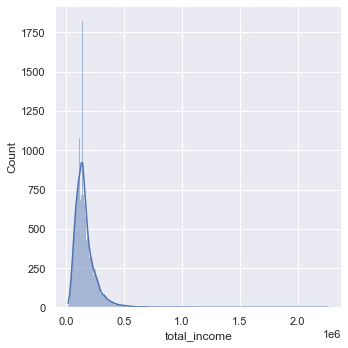

In [20]:
sns.displot(raw_data['total_income'], kde=True)

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>
Не  стоит забывать о том, что легенда графика важна для его качественного и легкого восприятия

</div>

В данном случае для заполнения пропусков целесообразнее использовать медианное значение

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Верно, но лучше бы сперва сгруппировать по какому-то признаку, а затем найти медианные значения
</div>

In [21]:
raw_data['total_income']=raw_data['total_income'].fillna(raw_data['total_income'].median())

Столбец *days_employed* убираем из набора

In [22]:
data = raw_data.drop(['days_employed'], axis = 1)

проверяем значения столбца children

In [23]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

числа -1 и 20 явно выделяются из набора и могут быть как и результатом ошибки при вводе, так и намеренными.
в совокупности, строки с этими значениями составляют менее одного процента от всех имеющихся данных, поэтому можно их удалить

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Верно
</div>

In [24]:
data = data.loc[data['children']!=20]
data = data.loc[data['children']!=-1]

проверяем текущее состояние набора данных

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21402 non-null  int64  
 1   dob_years         21402 non-null  int64  
 2   education         21402 non-null  object 
 3   education_id      21402 non-null  int64  
 4   family_status     21402 non-null  object 
 5   family_status_id  21402 non-null  int64  
 6   gender            21402 non-null  object 
 7   income_type       21402 non-null  object 
 8   debt              21402 non-null  int64  
 9   total_income      21402 non-null  float64
 10  purpose           21402 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

Пропущенные значения имелись в двух столбцах: days_employed и total_income
- *days_employed* имел некорректный формат, и зависимость между временем работы и возвратом кредита в срок не представляет интереса для заказчика, поэтому столбец был удалён полностью
- пропуски в *total_income* заполнены медианным значением для уменьшения влияния статистических выбросов

также удалены строки со значениями количества детей -1 и 20

### Замена типа данных

в столбце *total_income* использование вещественного типа данных нецелесообразно и мы можем заменить его на целочисленный

In [26]:
data['total_income'] = data['total_income'].astype('int')

In [27]:
data.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Вывод

Для замены формата был применён метод *astype* с аргументом *int*

### Обработка дубликатов

Сразу выделяется наличие дубликатов в столбце *education*, от них можно избавиться методом *str.lower()*

In [28]:
data['education'] = data['education'].str.lower()

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Молодец, когда данные регистронезависимые, их всегда стоит приводить к единому регистру
</div>

In [29]:
data['education'].head(10)

0     высшее
1    среднее
2    среднее
3    среднее
4    среднее
5     высшее
6     высшее
7    среднее
8     высшее
9    среднее
Name: education, dtype: object

In [30]:
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Столбец с образованием теперь в порядке. Проверим также столбцы *family_status* И *income_type*

In [31]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [32]:
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

In [33]:
data.duplicated(subset=None)

0        False
1        False
2        False
3        False
4        False
         ...  
21520    False
21521    False
21522    False
21523    False
21524    False
Length: 21402, dtype: bool

### Вывод

Дубликаты присутствовали в столбце *education* из-за использования символов в разных регистрах при заполнении.
В данном случае вероятно, что при подаче заявления, графа *образование* заполнялась вручную, тогда как *тип дохода* и *семейное положение* были выбраны из предложенных готовых вариантов 

Исправлено путём приведения к единому формату

Присутствует ещё одна графа *purpose* явно заполненная в свободной форме, которую необходимо обработать, применяя лемматизацию

### Лемматизация

In [34]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Видим, что одна и та же цель может описываться разными словами. Можно выделить четыре основных типа запросов:
- образование
- свадьба
- жильё
- автомобиль

Для подготовки данных столбца к категоризации проведём лемматизацию с помощью библиотеки pymystem3

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>
Стоило сперва произвести вычисления, доказывающие состоятельность вывода:) Например, посчитать частоту появления, а затем отсортировать и вывести
</div>

In [35]:
from pymystem3 import Mystem
m = Mystem()
data['lemmas'] = data['purpose'].apply(m.lemmatize)

Installing mystem to C:\Users\vlady/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


KeyboardInterrupt: 

In [36]:
data.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


### Вывод

путём применения функции lemmatize к данным добавлен столбец *lemmas*, содержащий списки лемматизированных слов из столбца *purpose*

### Категоризация данных

Перед нами стоят следующие вопросы:
 - "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
 - "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
 - "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
 - "Как разные цели кредита влияют на его возврат в срок?"
 
В наборе данных уже есть индикации наличия детей и семейного положения и уровня дохода, но для целей кредита и уровня дохода необходимо выделить основные категории.
Для категоризации целей кредита введём функцию key_purpose, которая будет применятся к столбцу *lemmas* и в зависимости от его содержания, возвращать одну из четырёх основных целей.

In [76]:
def key_purpose(row):
    if ("жилье" in row['lemmas'])|("недвижимость" in row['lemmas']):
        return "жилье"
    elif "автомобиль" in row['lemmas']:
        return "автомобиль"
    elif "свадьба" in row['lemmas']:
        return "свадьба"
    elif "образование" in row['lemmas']:
        return "образование"
    else:
        return "прочее"

In [77]:
data['key_purpose']=data.apply(key_purpose, axis=1)

In [78]:
data.head(20)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,key_purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, , жилье, \n]",жилье
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, , автомобиль, \n]",автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, , жилье, \n]",жилье
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, , образование, \n]",образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, , свадьба, \n]",свадьба
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,"[покупка, , жилье, \n]",жилье
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,"[операция, , с, , жилье, \n]",жилье
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,"[образование, \n]",образование
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,"[на, , проведение, , свадьба, \n]",свадьба
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,"[покупка, , жилье, , для, , семья, \n]",жилье


In [79]:
data.key_purpose.value_counts()

жилье          10780
автомобиль      4288
образование     3997
свадьба         2337
Name: key_purpose, dtype: int64

Категоризацию уровней дохода проведём путём разбивки на три категории: условные 'низкий','средний' и 'высокий' уровни. Для этого применим функцию percentile библиотеки numpy.
- нижние 20 процентов - низкий уровень
- между 20 и 80 процентов - средний уровень
- верхние 20 процентов - высокий уровень

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Молодец, многие забывают, что надо разбивать на группы исходя из статистических показателей 
</div>

In [80]:
import numpy as np
cut_points = [np.percentile(data['total_income'], i) for i in [20, 80]]


In [81]:
cut_points

[98592.4, 214242.59999999998]

In [82]:
data['income_group'] = 1
for i in range(2):
    data['income_group'] = data['income_group'] + (data['total_income'] < cut_points[i])
# или <= cut_points[i]

In [83]:
data[['total_income', 'income_group']].head(10)

,total_income,income_group
0,253875,1
1,112080,2
2,145885,2
3,267628,1
4,158616,2
5,255763,1
6,240525,1
7,135823,2
8,95856,3
9,144425,2


### Вывод

Данные о целях кредита были разбиты на четыре категории:
 - жилье
 - свадьба
 - автомобиль
 - образование
 
Данные об уровне дохода были разбиты на три категории:
- 3 - низкий уровень дохода
- 2 - средний
- 1 - высокий

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

сгруппируем данные по показателю количества детей и посчитаем количество должников и платящих вовремя

In [84]:
data_children = data.groupby(by=['children','debt']).agg({'debt':'count'})

In [85]:
data_children

debt
children debt       
0        0     13086
         1      1063
1        0      4374
         1       444
2        0      1861
         1       194
3        0       303
         1        27
4        0        37
         1         4
5        0         9

выведем процентное соотношение должников и платящих вовремя

In [86]:
data_children_percentage = data_children.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [87]:
data_children_percentage

debt
children debt            
0        0      92.487102
         1       7.512898
1        0      90.784558
         1       9.215442
2        0      90.559611
         1       9.440389
3        0      91.818182
         1       8.181818
4        0      90.243902
         1       9.756098
5        0     100.000000

### Вывод

Зависимость между наличием детей и возвратом кредита незначительна, но прослеживается увеличение процента должников с увеличением количества детей

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Верно
</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Здесь и далее действуем по аналогии с решением первого вопроса

In [88]:
data_family = data.groupby(by=['family_status_id','family_status','debt']).agg({'debt':'count'})

In [89]:
data_family

debt
family_status_id family_status         debt       
0                женат / замужем       0     11375
                                       1       927
1                гражданский брак      0      3775
                                       1       385
2                вдовец / вдова        0       889
                                       1        63
3                в разводе             0      1105
                                       1        84
4                Не женат / не замужем 0      2526
                                       1       273

In [90]:
data_family_percentage = data_family.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [91]:
data_family_percentage

debt
family_status_id family_status         debt           
0                женат / замужем       0     92.464640
                                       1      7.535360
1                гражданский брак      0     90.745192
                                       1      9.254808
2                вдовец / вдова        0     93.382353
                                       1      6.617647
3                в разводе             0     92.935240
                                       1      7.064760
4                Не женат / не замужем 0     90.246517
                                       1      9.753483

### Вывод

Зависимость между семейным положением и возвратом кредита в срок не очень значительна. Примечательно, что в группе вдов/вдовцов процент должников самый низкий

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [92]:
data_income = data.groupby(by=['income_group','debt']).agg({'debt':'count'})

In [93]:
data_income

debt
income_group debt       
1            0      3979
             1       302
2            0     11755
             1      1085
3            0      3936
             1       345

In [94]:
data_income_percentage = data_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [95]:
data_income_percentage

debt
income_group debt           
1            0     92.945573
             1      7.054427
2            0     91.549844
             1      8.450156
3            0     91.941135
             1      8.058865

### Вывод

Зависимость между уровнем дохода и возвратом кредита в срок незначительна

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>
Да все верно, но в банковском деле разница даже в полтора процента может быть значительна)
</div>

- Как разные цели кредита влияют на его возврат в срок?

In [96]:
data_purpose = data.groupby(by=['key_purpose','debt']).agg({'debt':'count'})

In [97]:
data_purpose

debt
key_purpose debt       
автомобиль  0      3888
            1       400
жилье       0     10000
            1       780
образование 0      3628
            1       369
свадьба     0      2154
            1       183

In [98]:
data_purpose_percentage = data_purpose.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [99]:
data_purpose_percentage

debt
key_purpose debt           
автомобиль  0     90.671642
            1      9.328358
жилье       0     92.764378
            1      7.235622
образование 0     90.768076
            1      9.231924
свадьба     0     92.169448
            1      7.830552

### Вывод

Зависимость между целью взятия кредита и возвратом в срок незначительна

### Шаг 4. Общий вывод

Зависимость между упомянутыми выше показателями прослеживается, но не выглядит значительной.
Для анализа не хватает такого показателя, как сумма взятого кредита.

<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Поздравляю с первым  проектом!

- Ты хорошо делаешь выводы и анализируешь результаты.
    
- Код написан аккуратно и качественно, спасибо.

- Соблюдена структура проекта, было приятно проверять:)
    
- Все написано четко и по делу

Написала пару замечаний, учти их в следующих работах


С первым успешным проектом!)
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.